In [20]:
import pandas as pd

# List of subject files
subjects = [
    "3001", "1001", "3002", "1002", "3003",
    "1003", "1004", "1005", "1006", "1007", "3004",
    "5002", "3005", "3006", "5003", "3007", "3008",
    "3009", "3010", "3011", "3012", "3013", "5004",
    "3014", "3015", "1008"
]

# Base path for subject files
base_path = "data/control/subject-"

# List to store data for the CSV file
data = []

# Specify the questions that require reverse scoring
reverse_scored_questions = [1, 2, 3, 5]

# Iterate through each subject
for subject in subjects:
    file_path = f"{base_path}{subject}.csv"
    try:
        df = pd.read_csv(file_path)

        # Extract 'rps_qs' as a list with the first 7 entries
        rps_qs_list = df['rps_qs'].head(7).tolist()
        
        # Increment each value in the list by 1
        incremented_list = [value + 1 for value in rps_qs_list]
        
        # Ensure exactly 7 entries (pad with None if less)
        while len(incremented_list) < 7:
            incremented_list.append(None)
        
        # Apply reverse scoring
        adjusted_list = [
            (10 - value if (i + 1) in reverse_scored_questions else value)
            for i, value in enumerate(incremented_list)
        ]
        
        # Calculate RPS total and mean
        total_rps = sum(filter(None, adjusted_list))  # Ignore None values in summation
        mean_rps = total_rps / len([x for x in adjusted_list if x is not None])
        
        # Add participant ID, responses, total, and mean to the data
        data.append([subject] + adjusted_list + [total_rps, mean_rps])
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Convert the data into a DataFrame
columns = ['Participant_ID'] + [f'Question_{i+1}' for i in range(7)] + ['RPS_Total', 'RPS_Mean']
df_output = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
output_file = "control_rps_with_scores.csv"
df_output.to_csv(output_file, index=False)

# If you are trying to get the 'RPS_mean' column from the DataFrame
list2 = df_output['RPS_Mean']  # Access the column directly from the DataFrame

# Convert to a list if needed
control_list = list(df_output['RPS_Mean'])

# Print conirmation
print(f"Data successfully saved to {output_file}")

Data successfully saved to control_rps_with_scores.csv


In [19]:
import pandas as pd

# List of subject files
subjects = [
    "2001", "2002", "4001", "2003", "6001", "4002", 
    "2004", "4003", "2005", "2006", "2007", "2008", 
    "6002", "2009", "4004", "2010", "4005", "4006", 
    "4007", "2011", "2012", "2013", "2014", 
    "2015", "6003", "2016"
]


# Base path for subject files
base_path = "data/exp/subject-"

# List to store data for the CSV file
data = []

# Specify the questions that require reverse scoring
reverse_scored_questions = [1, 2, 3, 5]

# Iterate through each subject
for subject in subjects:
    file_path = f"{base_path}{subject}.csv"
    try:
        df = pd.read_csv(file_path)

        # Extract 'rps_qs' as a list with the first 7 entries
        rps_qs_list = df['rps_qs'].head(7).tolist()
        
        # Increment each value in the list by 1
        incremented_list = [value + 1 for value in rps_qs_list]
        
        # Ensure exactly 7 entries (pad with None if less)
        while len(incremented_list) < 7:
            incremented_list.append(None)
        
        # Apply reverse scoring
        adjusted_list = [
            (10 - value if (i + 1) in reverse_scored_questions else value)
            for i, value in enumerate(incremented_list)
        ]
        
        # Calculate RPS total and mean
        total_rps = sum(filter(None, adjusted_list))  # Ignore None values in summation
        mean_rps = total_rps / len([x for x in adjusted_list if x is not None])
        
        # Add participant ID, responses, total, and mean to the data
        data.append([subject] + adjusted_list + [total_rps, mean_rps])
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Convert the data into a DataFrame
columns = ['Participant_ID'] + [f'Question_{i+1}' for i in range(7)] + ['RPS_Total', 'RPS_Mean']
df_output = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
output_file = "exp_rps_with_scores.csv"
df_output.to_csv(output_file, index=False)

list1 = df_output['RPS_Mean']  # Access the column directly from the DataFrame

# Convert to a list if needed
exp_list = list(df_output['RPS_Mean'])

# Print confirmation
print(f"Data successfully saved to {output_file}")

Data successfully saved to exp_rps_with_scores.csv


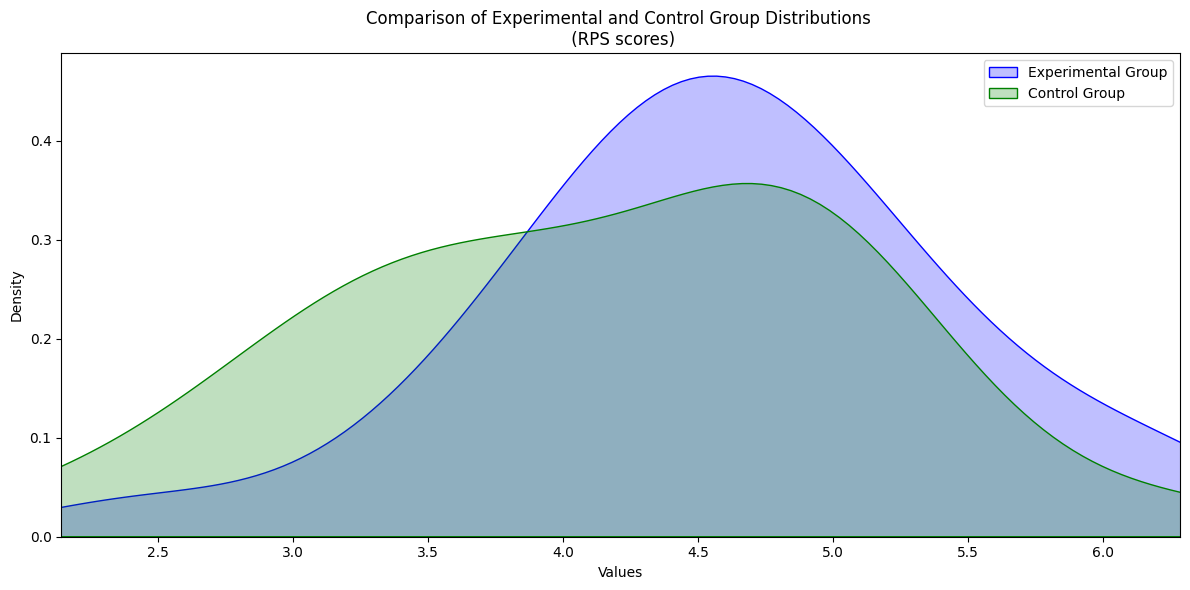

Shapiro-Wilk Test for Experimental Group: Statistic=0.979, p-value=0.843
Shapiro-Wilk Test for Control Group: Statistic=0.977, p-value=0.800
Data1 is normally distributed.
Data2 is normally distributed.
Mann-Whitney U Test: U Statistic = 421.0, p-value = 0.13009427175237565
The baseline data for both groups could be from the same population.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Control average data
control_average = [
    2.150, 3.400, 4.909, 3.750, 3.250, 3.636, 5.091, 4.067, 4.909, 4.071,
    3.909, 4.083, 3.000, 4.636, 2.053, 3.364, 4.231, 4.667, 4.636, 3.286,
    4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]

experimental_average = [
    4.4, 4.0, 3.6, 5.5, 4.2, 5.3, 4.2, 6.7, 4.5, 4.8,
    3.2, 3.1, 4.5, 3.7, 5.1, 6.8, 5.4, 4.7, 4.0, 4.5,
    3.0, 3.7, 3.9, 4.6, 4.6, 4.9
]

control_RPS_Mean = [
    5.285714, 4, 5.285714, 4.714286, 2.714286, 4.857143, 4.285714, 5, 
    3.142857, 3.857143, 3.142857, 3.571429, 2.142857, 3.285714, 5.142857, 
    4.714286, 4.857143, 3.428571, 4, 2.857143, 6.285714, 4.571429, 3.571429, 
    4.857143, 4.714286, 4
]

exp_rps_mean = [
    4.857143, 5.285714, 5.428571, 4.428571, 4.857143, 4.857143, 4.142857, 
    2.428571, 4.714286, 3.857143, 6.285714, 4.857143, 3.571429, 5.714286, 
    4.142857, 4.428571, 6.142857, 4.428571, 3.857143, 5.142857, 3.285714, 
    4.428571, 4.571429, 4.428571, 4, 5.285714
]

experimental_average = exp_rps_mean
control_average = control_RPS_Mean

# Create a figure
plt.figure(figsize=(12, 6))

# Plot KDE curves without histogram bins
sns.kdeplot(experimental_average, color='blue', label='Experimental Group', fill=True)
sns.kdeplot(control_average, color='green', label='Control Group', fill=True)

# Set the same x-axis limits for both KDE plots
plt.xlim(min(experimental_average + control_average), max(experimental_average + control_average))

# Add labels and legend
plt.title('Comparison of Experimental and Control Group Distributions \n (RPS scores)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_data1 = stats.shapiro(experimental_average)
shapiro_data2 = stats.shapiro(control_average)

print(f"Shapiro-Wilk Test for Experimental Group: Statistic={shapiro_data1.statistic:.3f}, p-value={shapiro_data1.pvalue:.3f}")
print(f"Shapiro-Wilk Test for Control Group: Statistic={shapiro_data2.statistic:.3f}, p-value={shapiro_data2.pvalue:.3f}")

# Determine normality
normal_data1 = shapiro_data1.pvalue > 0.05
normal_data2 = shapiro_data2.pvalue > 0.05

if normal_data1:
    print("Data1 is normally distributed.")
else:
    print("Data1 is not normally distributed.")

if normal_data2:
    print("Data2 is normally distributed.")
else:
    print("Data2 is not normally distributed.")

# Since the distributions are not normal, we use a Mann-Whitney U test to compare them
u_statistic, p_value = stats.mannwhitneyu(experimental_average, control_average)

# Report the result
print(f"Mann-Whitney U Test: U Statistic = {u_statistic}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("The baseline data for both groups are not from the same population.")
else:
    print("The baseline data for both groups could be from the same population.")

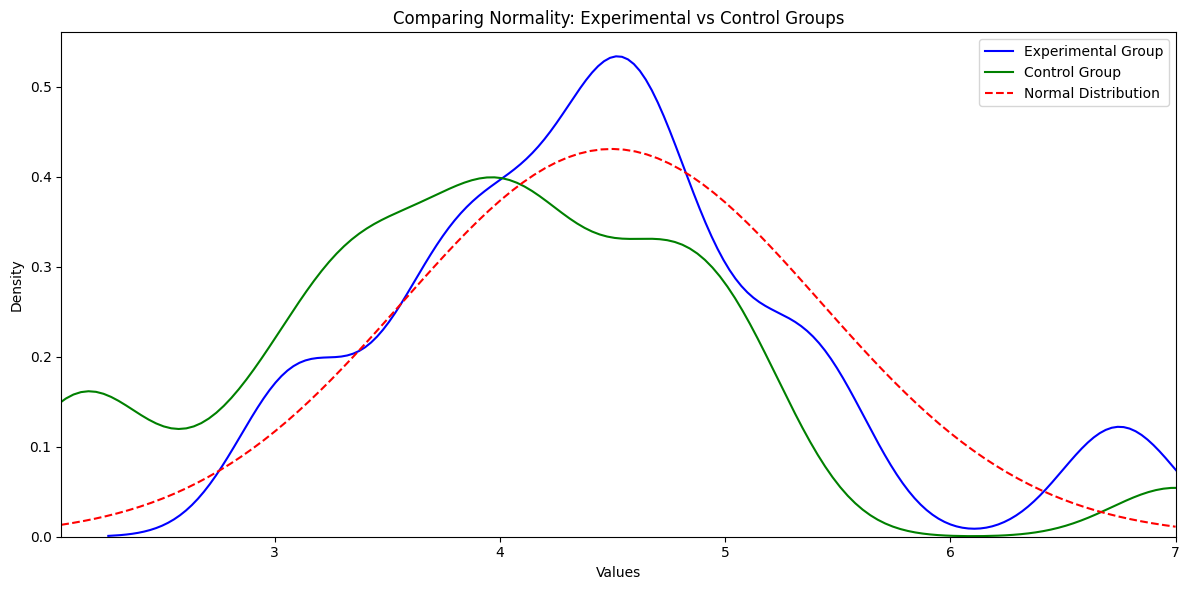

Shapiro-Wilk Test for Experimental Group: Statistic=0.943, p-value=0.162
Shapiro-Wilk Test for Control Group: Statistic=0.958, p-value=0.362
Data1 is normally distributed.
Data2 is normally distributed.
Mann-Whitney U Test: U Statistic = 433.5, p-value = 0.08202446174986282
The baseline data for both groups could be from the same population.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Control average data
control_average = [
    2.150, 3.400, 4.909, 3.750, 3.250, 3.636, 5.091, 4.067, 4.909, 4.071,
    3.909, 4.083, 3.000, 4.636, 2.053, 3.364, 4.231, 4.667, 4.636, 3.286,
    4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]

experimental_average = [
    4.4, 4.0, 3.6, 5.5, 4.2, 5.3, 4.2, 6.7, 4.5, 4.8,
    3.2, 3.1, 4.5, 3.7, 5.1, 6.8, 5.4, 4.7, 4.0, 4.5,
    3.0, 3.7, 3.9, 4.6, 4.6, 4.9
]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot KDE curves for both groups
sns.kdeplot(experimental_average, color='blue', label='Experimental Group', bw_adjust=0.5)
sns.kdeplot(control_average, color='green', label='Control Group', bw_adjust=0.5)

# Overlay a standard normal curve for reference
xmin, xmax = min(experimental_average + control_average), max(experimental_average + control_average)
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, np.mean(experimental_average), np.std(experimental_average)), 'r--', label='Normal Distribution')

# Set the x-axis limits to cover the range of both groups
plt.xlim(min(experimental_average + control_average), max(experimental_average + control_average))

# Add labels and legend
plt.title('Comparing Normality: Experimental vs Control Groups')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_data1 = stats.shapiro(experimental_average)
shapiro_data2 = stats.shapiro(control_average)

print(f"Shapiro-Wilk Test for Experimental Group: Statistic={shapiro_data1.statistic:.3f}, p-value={shapiro_data1.pvalue:.3f}")
print(f"Shapiro-Wilk Test for Control Group: Statistic={shapiro_data2.statistic:.3f}, p-value={shapiro_data2.pvalue:.3f}")

# Determine normality
normal_data1 = shapiro_data1.pvalue > 0.05
normal_data2 = shapiro_data2.pvalue > 0.05

if normal_data1:
    print("Data1 is normally distributed.")
else:
    print("Data1 is not normally distributed.")

if normal_data2:
    print("Data2 is normally distributed.")
else:
    print("Data2 is not normally distributed.")

# Since the distributions are not normal, we use a Mann-Whitney U test to compare them
u_statistic, p_value = stats.mannwhitneyu(experimental_average, control_average)

# Report the result
print(f"Mann-Whitney U Test: U Statistic = {u_statistic}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("The baseline data for both groups are not from the same population.")
else:
    print("The baseline data for both groups could be from the same population.")

In [63]:
import pandas as pd

# List of subjects
subjects = [
    "2001", "2002", "4001", "2003", "6001", "4002", 
    "2004", "4003", "2005", "2006", "2007", "2008", 
    "6002", "2009", "4004", "2010", "4005", "4006", 
    "4007", "2011", "2012", "2013", "2014", 
    "2015", "6003", "2016"
]

# Base path for subject files
base_path = "data/exp/subject-"

# Initialize an empty list to store the structured data
structured_data = []

# Loop through each file
for subject in subjects:
    file_name = f"{base_path}{subject}.csv"

    # Load the current CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Get the last 9 values from the "answers_post" column
    last_9_answers = df["answers_post"].tail(9).tolist()
    
    # Ensure exactly 9 values, filling with None if fewer exist
    while len(last_9_answers) < 9:
        last_9_answers.insert(0, None)
    
    # Add the row with the file name and answers
    structured_data.append([subject] + last_9_answers)

# Define the column names
columns = [
    "file_name", 
    "I am confident that I performed well on the BART task.", 
    "I believe I have above-average skills in making risk-related decisions.", 
    "If I were to attempt the BART task again, I believe I would achieve a higher score.", 
    "I felt confident in my decision to inflate the balloon during the task.", 
    "I feel that I understood the task requirements thoroughly.",
    "I believe that the calculations provided accurately understood my expertise.",
    "I believe my actual performance matched the feedback I received.",
    "I questioned the validity of the feedback given before the task.",
    "I think the feedback influenced my level of confidence during the task."
]

# Create a new DataFrame with structured data
output_df = pd.DataFrame(structured_data, columns=columns)

# Save the DataFrame to a new CSV file
output_df.to_csv("post_exp_answers_post.csv", index=False)

print("Data has been saved to 'post_exp_answers_post.csv'")

Data has been saved to 'post_exp_answers_post.csv'


In [59]:
#TAIL
import pandas as pd

# List of subjects
subjects = [
    "3001", "1001", "3002", "1002", "3003",
    "1003", "1004", "1005", "1006", "1007", "3004",
    "5002", "3005", "3006", "5003", "3007", "3008",
    "3009", "3010", "3011", "3012", "3013", "5004",
    "3014", "3015", "1008"
]

# Base path for subject files
base_path = "data/control/subject-"

# Initialize an empty list to store the structured data
structured_data = []

# Loop through each file
for subject in subjects:
    file_name = f"{base_path}{subject}.csv"

    # Load the current CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Get the last 5 values from the "answers_post" column
    last_5_answers = df["answers_post"].tail(5).tolist()
    
    # Ensure exactly 5 values, filling with None if fewer exist
    while len(last_5_answers) < 5:
        last_5_answers.insert(0, None)
    
    # Add the row with the file name and answers
    structured_data.append([subject] + last_5_answers)

# Create a new DataFrame with structured data
output_df = pd.DataFrame(structured_data, columns=["file_name", 
                                                   "I am confident that I performed well on the BART task.", 
                                                   "I believe I have above-average skills in making risk-related decisions.", 
                                                   "If I were to attempt the BART task again, I believe I would achieve a higher score.", 
                                                   "I felt confident in my decision to inflate the balloon during the task.", 
                                                   "I feel that I understood the task requirements thoroughly."])

# Save the DataFrame to a new CSV file
output_df.to_csv("post_control_answers_post.csv", index=False)

print("Data has been saved")

Data has been saved


In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(exp_list, control_list, alternative='two-sided')

# Print results
print("Mann-Whitney U statistic:", stat)
print("P-value:", p_value)

Mann-Whitney U statistic: 421.0
P-value: 0.13009427175237565


In [11]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp
from cliffs_delta import cliffs_delta

def analyze_two_samples(list1, list2):
    # Mean and Standard Deviation
    mean1, std1 = np.mean(list1), np.std(list1, ddof=1)
    mean2, std2 = np.mean(list2), np.std(list2, ddof=1)
    
    print(f"Group 1: Mean = {mean1:.3f}, Std Dev = {std1:.3f}")
    print(f"Group 2: Mean = {mean2:.3f}, Std Dev = {std2:.3f}")
    
    # Effect Size (Cohen's d)
    pooled_std = np.sqrt(((len(list1) - 1) * std1**2 + (len(list2) - 1) * std2**2) / (len(list1) + len(list2) - 2))
    cohen_d = (mean1 - mean2) / pooled_std
    print(f"Cohen's d Effect Size = {cohen_d:.3f}")
    
    # Independent t-test
    t_stat, p_ttest = ttest_ind(list1, list2, equal_var=False)
    print(f"Independent t-test: t-statistic = {t_stat:.3f}, p-value = {p_ttest:.3f}")
    
    # Cliff's Delta
    delta, interpretation = cliffs_delta(list1, list2)
    print(f"Cliff's Delta = {delta:.3f}, Interpretation = {interpretation}")
    
    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = ks_2samp(list1, list2)
    print(f"Kolmogorov-Smirnov Test: KS Statistic = {ks_stat:.3f}, p-value = {p_ks:.3f}")
    
    # Mann-Whitney U Test
    u_stat, p_mwu = mannwhitneyu(list1, list2, alternative='two-sided')
    print(f"Mann-Whitney U Test: U Statistic = {u_stat:.3f}, p-value = {p_mwu:.3f}")
    
    print("\nSummary:")
    print(f"Means: {mean1:.3f} (Group 1) vs {mean2:.3f} (Group 2)")
    print(f"Cohen's d: {cohen_d:.3f}, Cliff's Delta: {delta:.3f} ({interpretation})")
    print(f"t-test p-value: {p_ttest:.3f}, KS p-value: {p_ks:.3f}, Mann-Whitney p-value: {p_mwu:.3f}")

# Example Usage

analyze_two_samples(exp_list, control_list)


Group 1: Mean = 4.593, Std Dev = 0.853
Group 2: Mean = 4.165, Std Dev = 0.967
Cohen's d Effect Size = 0.470
Independent t-test: t-statistic = 1.695, p-value = 0.096
Cliff's Delta = 0.246, Interpretation = small
Kolmogorov-Smirnov Test: KS Statistic = 0.269, p-value = 0.307
Mann-Whitney U Test: U Statistic = 421.000, p-value = 0.130

Summary:
Means: 4.593 (Group 1) vs 4.165 (Group 2)
Cohen's d: 0.470, Cliff's Delta: 0.246 (small)
t-test p-value: 0.096, KS p-value: 0.307, Mann-Whitney p-value: 0.130


In [ ]:
Pump_average = [
    4.417, 4.000, 3.636, 5.500, 4.154, 5.308, 4.182, 6.700, 4.545, 4.750, 
    3.231, 3.067, 4.545, 3.692, 5.100, 6.750, 5.444, 4.714, 4.000, 4.538, 
    3.000, 3.700, 3.857, 4.615, 4.625, 4.857,
    2.150, 3.400, 4.909, 3.750, 3.250, 3.636, 5.091, 4.067, 4.909, 4.071, 
    3.909, 4.083, 3.000, 4.636, 2.053, 3.364, 4.231, 4.667, 4.636, 3.286, 
    4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]

RPS_Mean = [
    5.285714, 4, 5.285714, 4.714286, 2.714286, 4.857143, 4.285714, 5, 
    3.142857, 3.857143, 3.142857, 3.571429, 2.142857, 3.285714, 5.142857, 
    4.714286, 4.857143, 3.428571, 4, 2.857143, 6.285714, 4.571429, 3.571429, 
    4.857143, 4.714286, 4, 4.857143, 5.285714, 5.428571, 4.428571, 4.857143, 
    4.857143, 4.142857, 2.428571, 4.714286, 3.857143, 6.285714, 4.857143, 
    3.571429, 5.714286, 4.142857, 4.428571, 6.142857, 4.428571, 3.857143, 
    5.142857, 3.285714, 4.428571, 4.571429, 4.428571, 4, 5.285714
]


import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp
from cliffs_delta import cliffs_delta

def analyze_two_samples(list1, list2):
    # Mean and Standard Deviation
    mean1, std1 = np.mean(list1), np.std(list1, ddof=1)
    mean2, std2 = np.mean(list2), np.std(list2, ddof=1)
    
    print(f"Group 1: Mean = {mean1:.3f}, Std Dev = {std1:.3f}")
    print(f"Group 2: Mean = {mean2:.3f}, Std Dev = {std2:.3f}")
    
    # Effect Size (Cohen's d)
    pooled_std = np.sqrt(((len(list1) - 1) * std1**2 + (len(list2) - 1) * std2**2) / (len(list1) + len(list2) - 2))
    cohen_d = (mean1 - mean2) / pooled_std
    print(f"Cohen's d Effect Size = {cohen_d:.3f}")
    
    # Independent t-test
    t_stat, p_ttest = ttest_ind(list1, list2, equal_var=False)
    print(f"Independent t-test: t-statistic = {t_stat:.3f}, p-value = {p_ttest:.3f}")
    
    # Cliff's Delta
    delta, interpretation = cliffs_delta(list1, list2)
    print(f"Cliff's Delta = {delta:.3f}, Interpretation = {interpretation}")
    
    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = ks_2samp(list1, list2)
    print(f"Kolmogorov-Smirnov Test: KS Statistic = {ks_stat:.3f}, p-value = {p_ks:.3f}")
    
    # Mann-Whitney U Test
    u_stat, p_mwu = mannwhitneyu(list1, list2, alternative='two-sided')
    print(f"Mann-Whitney U Test: U Statistic = {u_stat:.3f}, p-value = {p_mwu:.3f}")
    
    print("\nSummary:")
    print(f"Means: {mean1:.3f} (Group 1) vs {mean2:.3f} (Group 2)")
    print(f"Cohen's d: {cohen_d:.3f}, Cliff's Delta: {delta:.3f} ({interpretation})")
    print(f"t-test p-value: {p_ttest:.3f}, KS p-value: {p_ks:.3f}, Mann-Whitney p-value: {p_mwu:.3f}")

# Example Usage

exp_5_trials = [
    6.3, 4.3, 3.5, 6.0, 4.7, 5.3, 5.0, 7.5, 6.0, 5.0, 
    2.7, 3.3, 4.5, 3.3, 4.0, 6.0, 8.5, 3.7, 5.8, 5.8, 
    4.0, 4.3, 4.3, 3.5, 6.5, 4.0
]

# Control group - 5 trials
control_5_trials = [
    1.0, 3.5, 4.5, 3.5, 3.0, 3.5, 6.0, 2.7, 4.5, 4.0, 
    5.0, 3.7, 3.5, 2.0, 2.0, 3.0, 4.0, 3.5, 3.5, 4.0, 
    4.0, 2.0, 2.8, 6.5, 6.5
]

# Control group - 10 trials
control_10_trials = [
    1.50, 3.00, 5.00, 3.83, 3.13, 4.14, 5.20, 3.50, 5.00, 4.00,
    4.00, 4.00, 3.00, 4.40, 2.00, 3.80, 3.29, 4.43, 4.50, 3.71,
    3.67, 4.14, 2.11, 3.50, 6.50, 5.33
]

# Experimental group - 10 trials
exp_10_trials = [
    5.166666667, 4, 4.4, 5.5, 4.428571429, 4.833333333, 4.5, 6.5, 
    4.6, 5, 2.666666667, 3.375, 4.428571429, 3.428571429, 4, 
    6.6, 6.5, 4.666666667, 4.428571429, 4.833333333, 3.571428571, 
    3.5, 4, 4.75, 5.333333333, 4.333333333
]

c_explode = [
    0, 10, 9, 8, 4, 9, 9, 5, 9, 6, 9, 8, 6, 9, 1, 9, 7, 8, 9, 6, 8, 4, 4, 5, 13, 7
]

e_explode = [
    8, 7, 9, 10, 7, 7, 9, 10, 9, 8, 7, 5, 9, 7, 10, 12, 11, 13, 6, 7, 8, 10, 6, 7, 12, 13
]

# Data
e_earnings = [53, 52, 40, 55, 54, 69, 46, 67, 50, 57, 42, 46, 50, 48, 51, 54, 49, 33, 56, 59, 36, 37, 54, 60, 37, 34]
c_earnings = [43, 34, 54, 45, 52, 40, 56, 61, 54, 57, 43, 49, 42, 51, 39, 37, 55, 56, 51, 46, 52, 60, 36, 42, 49, 67]



for i in range(26):
    e_earnings[i] = e_earnings[i] * 0.05
    c_earnings[i] = c_earnings[i] * 0.05

# analyze_two_samples(e_average, c_average)
# print("_________________________________________________________")
# analyze_two_samples(exp_5_trials,control_5_trials)
# print("_________________________________________________________")
# analyze_two_samples(exp_10_trials,control_10_trials)
# analyze_two_samples(e_explode, c_explode)

control_average = [
    2.150, 3.400, 4.909, 3.750, 3.250, 3.636, 5.091, 4.067, 4.909, 4.071,
    3.909, 4.083, 3.000, 4.636, 2.053, 3.364, 4.231, 4.667, 4.636, 3.286,
    4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]


experimental_average = [
    4.4, 4.0, 3.6, 5.5, 4.2, 5.3, 4.2, 6.7, 4.5, 4.8,
    3.2, 3.1, 4.5, 3.7, 5.1, 6.8, 5.4, 4.7, 4.0, 4.5,
    3.0, 3.7, 3.9, 4.6, 4.6, 4.9
]

analyze_two_samples(exp_5_trials, control_average)


Group 1: Mean = 4.915, Std Dev = 1.396
Group 2: Mean = 3.938, Std Dev = 1.083
Cohen's d Effect Size = 0.783
Independent t-test: t-statistic = 2.821, p-value = 0.007
Cliff's Delta = 0.396, Interpretation = medium
Kolmogorov-Smirnov Test: KS Statistic = 0.346, p-value = 0.089
Mann-Whitney U Test: U Statistic = 472.000, p-value = 0.015

Summary:
Means: 4.915 (Group 1) vs 3.938 (Group 2)
Cohen's d: 0.783, Cliff's Delta: 0.396 (medium)
t-test p-value: 0.007, KS p-value: 0.089, Mann-Whitney p-value: 0.015


In [45]:
import pandas as pd
from scipy import stats

# Given data
c_last5 = [
    3.00, 4.00, 3.67, 4.33, 3.75, 3.00, 4.00, 5.00, 5.50, 4.00, 2.33, 4.50, 
    3.25, 6.50, 2.25, 3.50, 7.00, 5.50, 4.33, 3.50, 4.33, 3.80, 2.50, 1.33, 
    8.00, 6.00, 3.00, 4.00, 3.00, 5.50, 4.00, 6.00, 3.67, 7.00, 4.50, 5.00, 
    4.67, 2.50, 5.00, 3.33, 7.50, 6.50, 4.00, 5.00, 4.67, 4.00, 2.00, 2.00, 
    4.00, 4.25, 4.67, 8.00
]

RPS_Mean = [
    5.285714, 4, 5.285714, 4.714286, 2.714286, 4.857143, 4.285714, 5, 
    3.142857, 3.857143, 3.142857, 3.571429, 2.142857, 3.285714, 5.142857, 
    4.714286, 4.857143, 3.428571, 4, 2.857143, 6.285714, 4.571429, 3.571429, 
    4.857143, 4.714286, 4, 4.857143, 5.285714, 5.428571, 4.428571, 4.857143, 
    4.857143, 4.142857, 2.428571, 4.714286, 3.857143, 6.285714, 4.857143, 
    3.571429, 5.714286, 4.142857, 4.428571, 6.142857, 4.428571, 3.857143, 
    5.142857, 3.285714, 4.428571, 4.571429, 4.428571, 4, 5.285714
]

# Truncate both lists to the same length
min_length = min(len(c_last5), len(RPS_Mean))
c_last5_clean = c_last5[:min_length]
RPS_Mean_clean = RPS_Mean[:min_length]

# Create a DataFrame
df = pd.DataFrame({'c-last5': c_last5_clean, 'RPS_Mean': RPS_Mean_clean})

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr( df['RPS_Mean'],df['c-last5'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: -0.06648275041504736
P-value: 0.6395854258445268


In [ ]:
import pandas as pd

# List of subject files
subjects = [
    "3001", "1001", "3002", "1002", "3003",
    "1003", "1004", "1005", "1006", "1007", "3004",
    "5002", "3005", "3006", "5003", "3007", "3008",
    "3009", "3010", "3011", "3012", "3013", "5004",
    "3014", "3015", "1008"
]

# Base path for subject files
base_path = "data/control/subject-"

# Initialize a list to store results
results = []

# Number of rounds to process
rounds = 20

# Iterate through each subject
for subject in subjects:
    file_path = f"{base_path}{subject}.csv"
    df = pd.read_csv(file_path)

    # Initialize a list for storing results of this participant
    participant_row = [subject]  # Start with the participant ID

    # Iterate through numbers in count_BART (0 to 19 for 20 rounds)
    for num in range(rounds):
        # Filter rows where count_BART matches the current number
        rows_for_num = df[df['count_BART'] == num]

        # Check if any row for this number has explode == "yes" or break_bool == 1
        if any(rows_for_num['explode'] == "yes") and any(rows_for_num['break_bool'] == 1):
            participant_row.append(-1)  # Assign -1 for exploded or broken rounds
        else:
            # Count rows where explode == "no" and break_bool == 0
            matching_rows = rows_for_num[(rows_for_num['explode'] == "no") & (rows_for_num['break_bool'] == 0)]
            participant_row.append(len(matching_rows))  # Add the count of matching rows

    # Ensure the row has the correct length (21 columns: ID + 20 rounds)
    while len(participant_row) < rounds + 1:
        participant_row.append(0)  # Fill missing rounds with 0

    # Append the participant row to results
    results.append(participant_row)

# Convert the results list into a DataFrame
columns = ['Participant_ID'] + [f'Try_{i+1}' for i in range(rounds)]  # Column names
results_df = pd.DataFrame(results, columns=columns)

# Save or display the results DataFrame
print(results_df)

# Optionally save to a CSV file
results_df.to_csv("BART_control_results_20_rounds.csv", index=False)

   Participant_ID  Try_1  Try_2  Try_3  Try_4  Try_5  Try_6  Try_7  Try_8  \
0            3001      1      1      1      1      1      2      2      2   
1            1001     -1     -1     -1      2      5     -1     -1      2   
2            3002     -1      5     -1     -1      4      5      5     -1   
3            1002     -1     -1      4     -1      3      3      4     -1   
4            3003      4      2     -1      3      3      4      2      3   
5            1003      4     -1      3      5      2     -1      4     -1   
6            1004     -1      6     -1      6     -1      4     -1      4   
7            1005      3     -1     -1      3      2      3      4      4   
8            1006     -1      5     -1     -1      4      4     -1     -1   
9            1007     -1     -1      3      4      5     -1      4      3   
10           3004      4      5     -1      6     -1     -1     -1     -1   
11           5002      3     -1      3     -1      5      4      5     -1   

In [23]:
import pandas as pd

# List of subject files
subjects = [
    "2001", "2002", "4001", "2003", "6001", "4002", 
    "2004", "4003", "2005", "2006", "2007", "2008", 
    "6002", "2009", "4004", "2010", "4005", "4006", 
    "4007", "2011", "2012", "2013", "2014", 
    "2015", "6003", "2016"
]

# Base path for subject files
base_path = "data/exp/subject-"

# Initialize a list to store results
results = []

# Number of rounds to process
rounds = 20

# Iterate through each subject
for subject in subjects:
    file_path = f"{base_path}{subject}.csv"
    df = pd.read_csv(file_path)

    # Initialize a list for storing results of this participant
    participant_row = [subject]  # Start with the participant ID

    # Iterate through numbers in count_BART (0 to 19 for 20 rounds)
    for num in range(rounds):
        # Filter rows where count_BART matches the current number
        rows_for_num = df[df['count_BART'] == num]

        # Check if any row for this number has explode == "yes" or break_bool == 1
        if any(rows_for_num['explode'] == "yes") and any(rows_for_num['break_bool'] == 1):
            participant_row.append(-1)  # Assign -1 for exploded or broken rounds
        else:
            # Count rows where explode == "no" and break_bool == 0
            matching_rows = rows_for_num[(rows_for_num['explode'] == "no") & (rows_for_num['break_bool'] == 0)]
            participant_row.append(len(matching_rows))  # Add the count of matching rows

    # Ensure the row has the correct length (21 columns: ID + 20 rounds)
    while len(participant_row) < rounds + 1:
        participant_row.append(0)  # Fill missing rounds with 0

    # Append the participant row to results
    results.append(participant_row)

# Convert the results list into a DataFrame
columns = ['Participant_ID'] + [f'Try_{i+1}' for i in range(rounds)]  # Column names
results_df = pd.DataFrame(results, columns=columns)

# Save or display the results DataFrame
print(results_df)

# Optionally save to a CSV file
results_df.to_csv("BART_exp_results_20_rounds.csv", index=False)

   Participant_ID  Try_1  Try_2  Try_3  Try_4  Try_5  Try_6  Try_7  Try_8  \
0            2001      6     -1      6      7     -1      5     -1      6   
1            2002      4      3     -1      4      6     -1      3     -1   
2            4001     -1     -1      3     -1      4      5      6     -1   
3            2003      7     -1      5     -1     -1     -1      5      5   
4            6001     -1      5      5     -1      4      5     -1      4   
5            4002     -1      4      6     -1      6     -1      4      3   
6            2004      4      6     -1      5      5     -1     -1     -1   
7            4003      8     -1     -1      7     -1     -1     -1      6   
8            2005      7     -1      5     -1     -1      3     -1      3   
9            2006      6      5     -1      3      6     -1      6     -1   
10           2007     -1      3      3     -1      2     -1      2      3   
11           2008      3      4     -1      3      3      4      4      4   

Spearman's correlation coefficient: 0.09467557780585073
P-value: 0.6454831688735327
The correlation is not statistically significant.


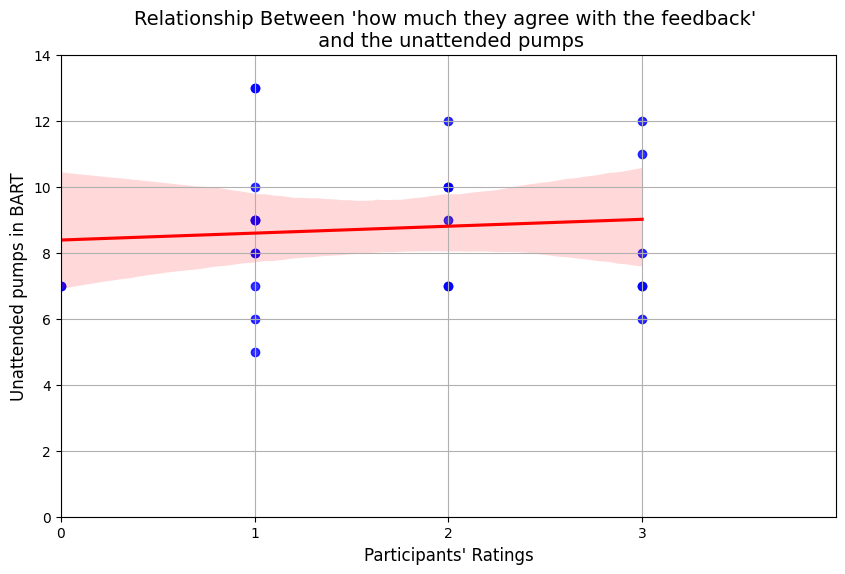

In [26]:
from scipy.stats import spearmanr

# Example lists: ordinal data and ratio data
# Self-confidence ratings (first set of numbers)
confidence_ratings = [
    4, 2, 1, 3, 2, 2, 3, 2, 0, 1, 3, 1, 2, 0, 3, 1, 2, 2, 2, 3,
    2, 3, 4, 1, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 3,
    2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 1, 2
]

# Explode count (second set of numbers)
explode_count = [
    0, 10, 9, 8, 4, 9, 9, 5, 9, 6, 9, 8, 6, 9, 1, 9, 7, 8, 9, 6,
    8, 4, 4, 5, 13, 7, 8, 7, 9, 10, 7, 7, 9, 10, 9, 8, 7, 5, 9, 7,
    10, 12, 11, 13, 6, 7, 8, 10, 6, 7, 12, 13
]

above_average_inBART = [
    4, 1, 2, 2, 2, 2, 3, 3, 0, 2, 2, 1, 3, 1, 2, 1, 2, 1, 3, 3,
    1, 3, 3, 1, 1, 1, 3, 3, 0, 2, 1, 2, 2, 2, 3, 2, 3, 3, 2, 3,
    1, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 3
]

belief_in_calculations = [
    2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 4, 2, 3, 2, 3, 2, 1, 3, 3,
    3, 4, 4, 4, 2, 2
]

exp_explode = [
    8, 7, 9, 10, 7, 7, 9, 10, 9, 8, 7, 5, 9, 7, 10, 12, 11, 13,
    6, 7, 8, 10, 6, 7, 12, 13
]

Pump_average = [
    4.417, 4.000, 3.636, 5.500, 4.154, 5.308, 4.182, 6.700, 4.545, 4.750, 
    3.231, 3.067, 4.545, 3.692, 5.100, 6.750, 5.444, 4.714, 4.000, 4.538, 
    3.000, 3.700, 3.857, 4.615, 4.625, 4.857,
    2.150, 3.400, 4.909, 3.750, 3.250, 3.636, 5.091, 4.067, 4.909, 4.071, 
    3.909, 4.083, 3.000, 4.636, 2.053, 3.364, 4.231, 4.667, 4.636, 3.286, 
    4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]

experimental_average = [
    4.4, 4.0, 3.6, 5.5, 4.2, 5.3, 4.2, 6.7, 4.5, 4.8,
    3.2, 3.1, 4.5, 3.7, 5.1, 6.8, 5.4, 4.7, 4.0, 4.5,
    3.0, 3.7, 3.9, 4.6, 4.6, 4.9
]


c_earnings = [53, 52, 40, 55, 54, 69, 46, 67, 50, 57, 42, 46, 50, 48, 51, 54, 49, 33, 56, 59, 36, 37, 54, 60, 37, 34, 43, 34, 54, 45, 52, 40, 56, 61, 54, 57, 43, 49, 42, 51, 39, 37, 55, 56, 51, 46, 52, 60, 36, 42, 49, 67]


for i in range(52):
    c_earnings[i] = c_earnings[i] * 0.05


#did they question it?
validity_feedback = [
    1, 0, 1, 2, 0, 2, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1
]

confidence_ratings = validity_feedback

explode_count =  exp_explode

# confidence_ratings = above_average_inBART

# Calculate Spearman's correlation
correlation, p_value = spearmanr(confidence_ratings, explode_count)

# Print results
print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=confidence_ratings, y=explode_count, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set axis limits to start from zero
plt.xlim(0, max(confidence_ratings)+1)  # Add a small buffer
plt.ylim(0, max(explode_count) + 1)   # Add a small buffer

# Set x-axis ticks to integers only
plt.xticks(range(0, max(confidence_ratings)+1, 1))  # Includes all integers up to max + 1

# Add titles and labels
plt.title(f"Relationship Between 'how much they agree with the feedback' \n and the unattended pumps", fontsize=14)
plt.xlabel("Participants' Ratings", fontsize=12)
plt.ylabel("Unattended pumps in BART", fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

Pearson correlation coefficient: 0.02289625996544908
P-value: 0.8720030387056938
The correlation is not statistically significant.


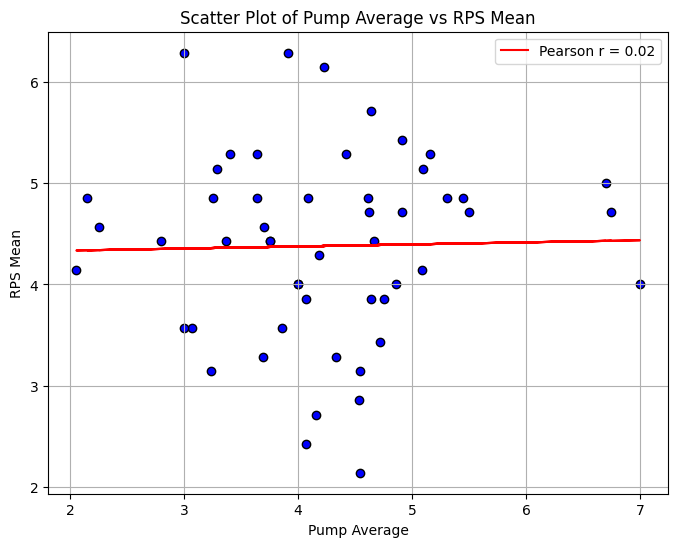

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example ratio data
Pump_average = [
    4.417, 4.000, 3.636, 5.500, 4.154, 5.308, 4.182, 6.700, 4.545, 4.750, 
    3.231, 3.067, 4.545, 3.692, 5.100, 6.750, 5.444, 4.714, 4.000, 4.538, 
    3.000, 3.700, 3.857, 4.615, 4.625, 4.857, 2.150, 3.400, 4.909, 3.750, 
    3.250, 3.636, 5.091, 4.067, 4.909, 4.071, 3.909, 4.083, 3.000, 4.636, 
    2.053, 3.364, 4.231, 4.667, 4.636, 3.286, 4.333, 3.750, 2.250, 2.800, 7.000, 5.154
]

RPS_Mean = [
    5.285714, 4, 5.285714, 4.714286, 2.714286, 4.857143, 4.285714, 5, 
    3.142857, 3.857143, 3.142857, 3.571429, 2.142857, 3.285714, 5.142857, 
    4.714286, 4.857143, 3.428571, 4, 2.857143, 6.285714, 4.571429, 3.571429, 
    4.857143, 4.714286, 4, 4.857143, 5.285714, 5.428571, 4.428571, 4.857143, 
    4.857143, 4.142857, 2.428571, 4.714286, 3.857143, 6.285714, 4.857143, 
    3.571429, 5.714286, 4.142857, 4.428571, 6.142857, 4.428571, 3.857143, 
    5.142857, 3.285714, 4.428571, 4.571429, 4.428571, 4, 5.285714
]

# Check if the lists are the same size
if len(Pump_average) != len(RPS_Mean):
    raise ValueError("The two lists must be of the same length.")

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Pump_average, RPS_Mean)

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Pump_average, RPS_Mean, color='blue', edgecolors='black')
plt.title('Scatter Plot of Pump Average vs RPS Mean')
plt.xlabel('Pump Average')
plt.ylabel('RPS Mean')

# Add a line representing the best-fit line (linear regression line)
slope, intercept, r_value, p_value, std_err = stats.linregress(Pump_average, RPS_Mean)
plt.plot(Pump_average, intercept + slope * np.array(Pump_average), 'r', label=f'Pearson r = {correlation_coefficient:.2f}')
plt.legend()

plt.grid(True)
plt.show()